# Efficient-CapsNet Model Test

In this notebook we provide a simple interface to test the different trained Efficient-CapsNet models on the three datasets:

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [3]:
!git clone https://github.com/EscVM/Efficient-CapsNet.git

fatal: destination path 'Efficient-CapsNet' already exists and is not an empty directory.


In [4]:
# 현재 작업 디렉토리 확인
!ls

# 클론한 레포지토리로 이동
%cd Efficient-CapsNet

# 레포지토리 내 파일 및 폴더 확인
!ls

Efficient-CapsNet  sample_data
/content/Efficient-CapsNet
bin							      models
config.json						      original_capsnet_test.ipynb
dynamic_visualization_capsules_dimensions_perturbation.ipynb  original_capsnet_train.ipynb
efficient_capsnet_test.ipynb				      README.md
efficient_capsnet_train.ipynb				      requirements.txt
LICENSE							      utils
media


In [5]:
import sys
sys.path.append('/content/Efficient-CapsNet')  # 경로를 Python 경로에 추가

In [6]:
!pip install -r requirements.txt

In [5]:
# TensorFlow와 Addons 호환성을 맞추기 위해 버전 조정
!pip install tensorflow==2.12.0 tensorflow-addons==0.20.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
 

In [ ]:
# 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# 런타임 재시작 후 코드 실행
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from models import EfficientCapsNet

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# test는 데이터양이 적어서 gpu를 사용하지 않아도 됨
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)

In [10]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

# Check if any GPUs are detected
if gpus:
    # Set the first GPU as visible and enable memory growth
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("GPU is available and configured.")
else:
    print("No GPU detected. Using CPU instead.")

No GPU detected. Using CPU instead.


In [11]:
# some parameters
model_name = 'MNIST'
custom_path = None # if you've trained a new model, insert here the full graph weights path

# 1.0 Import the Dataset

In [12]:
dataset = Dataset(model_name, config_path='config.json')

11490434/11490434 [==============================] - 0s 0us/step
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

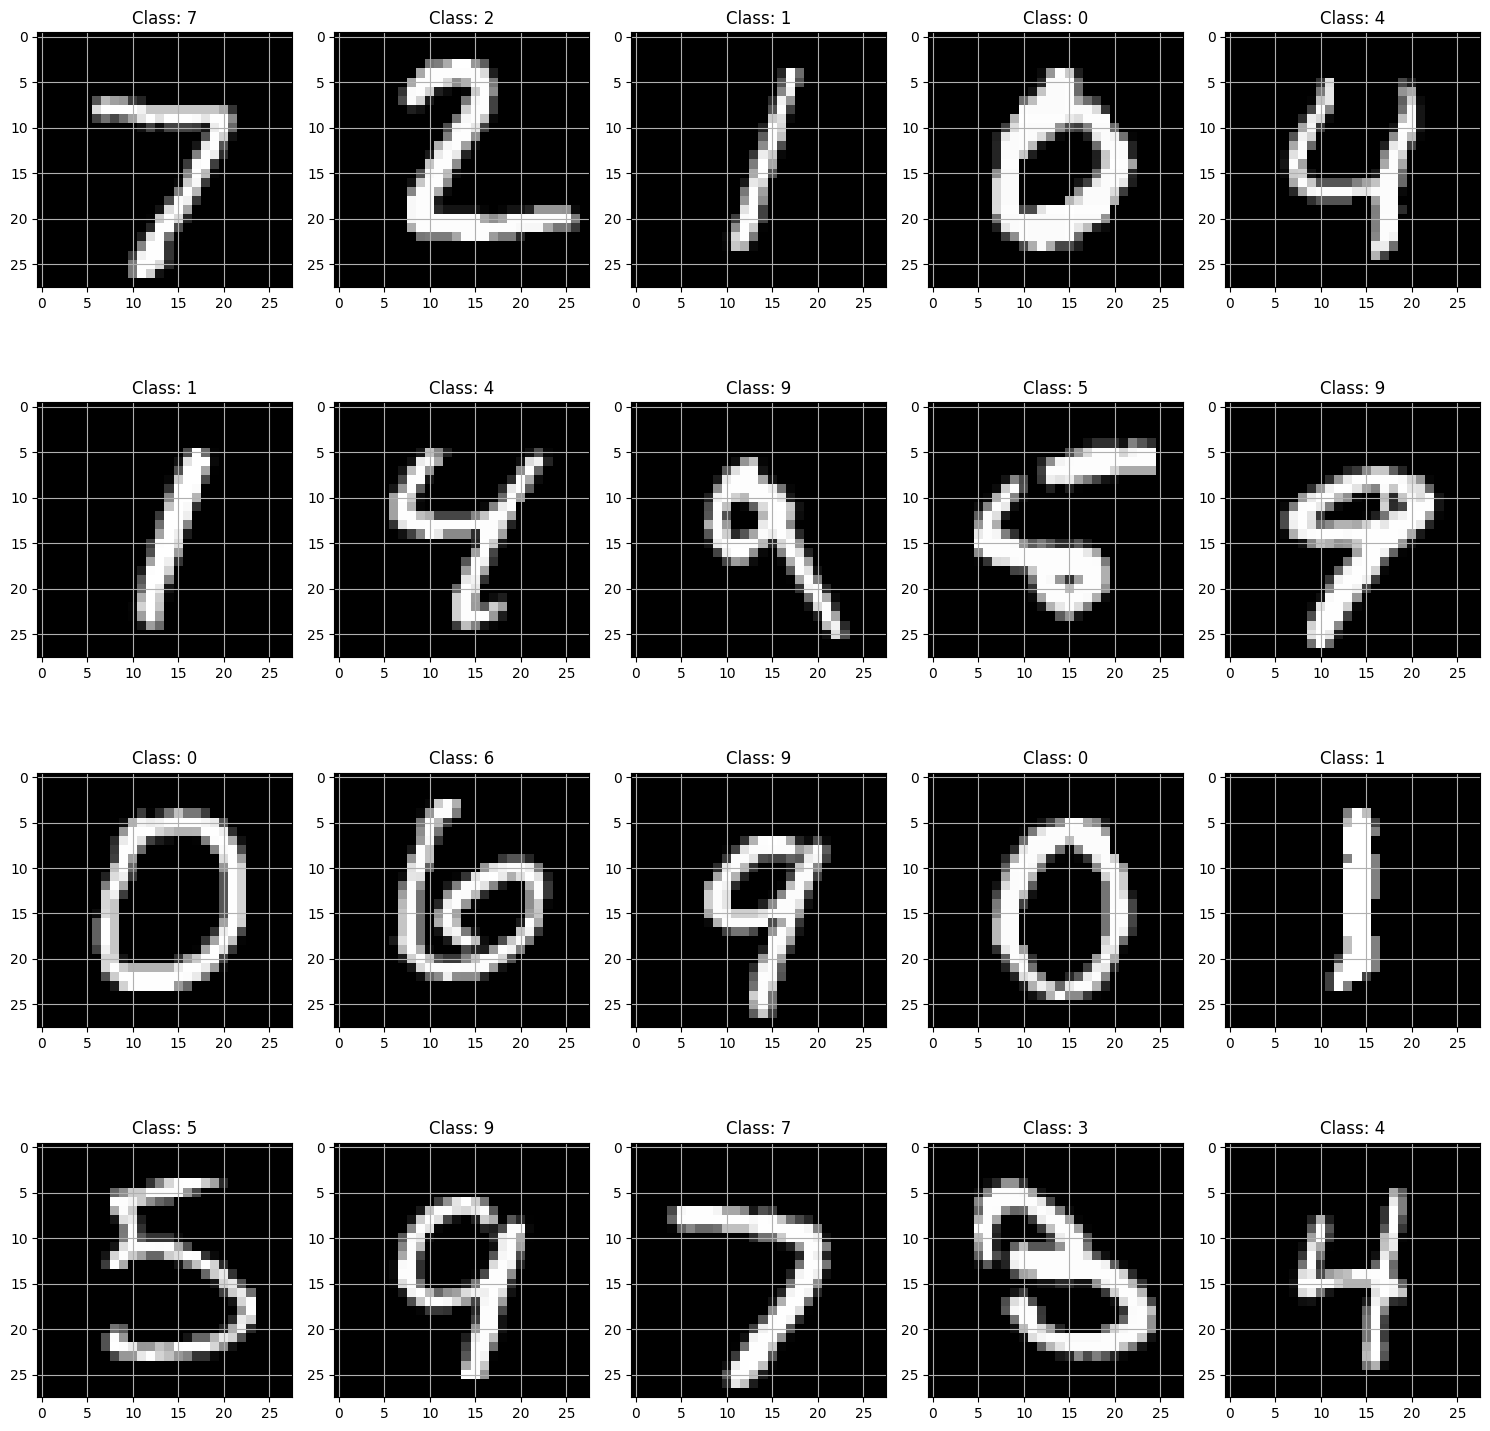

In [13]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [14]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path=custom_path)

model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)  

# 3.0 Test the Model

In [15]:
model_test.evaluate(dataset.X_test, dataset.y_test) # if "smallnorb" use X_test_patch

------------------------------MNIST Evaluation------------------------------
  3/313 [..............................] - ETA: 19s

2024-12-07 11:04:59.526856: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7ddeec03e940 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-12-07 11:04:59.526951: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Host, Default Version
2024-12-07 11:04:59.584719: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 [==============================] - 21s 65ms/step
Test acc: 0.9978
Test error [%]: 0.2200%
N° misclassified images: 21 out of 10000


## 3.1 Plot misclassified images

313/313 [==============================] - 19s 59ms/step


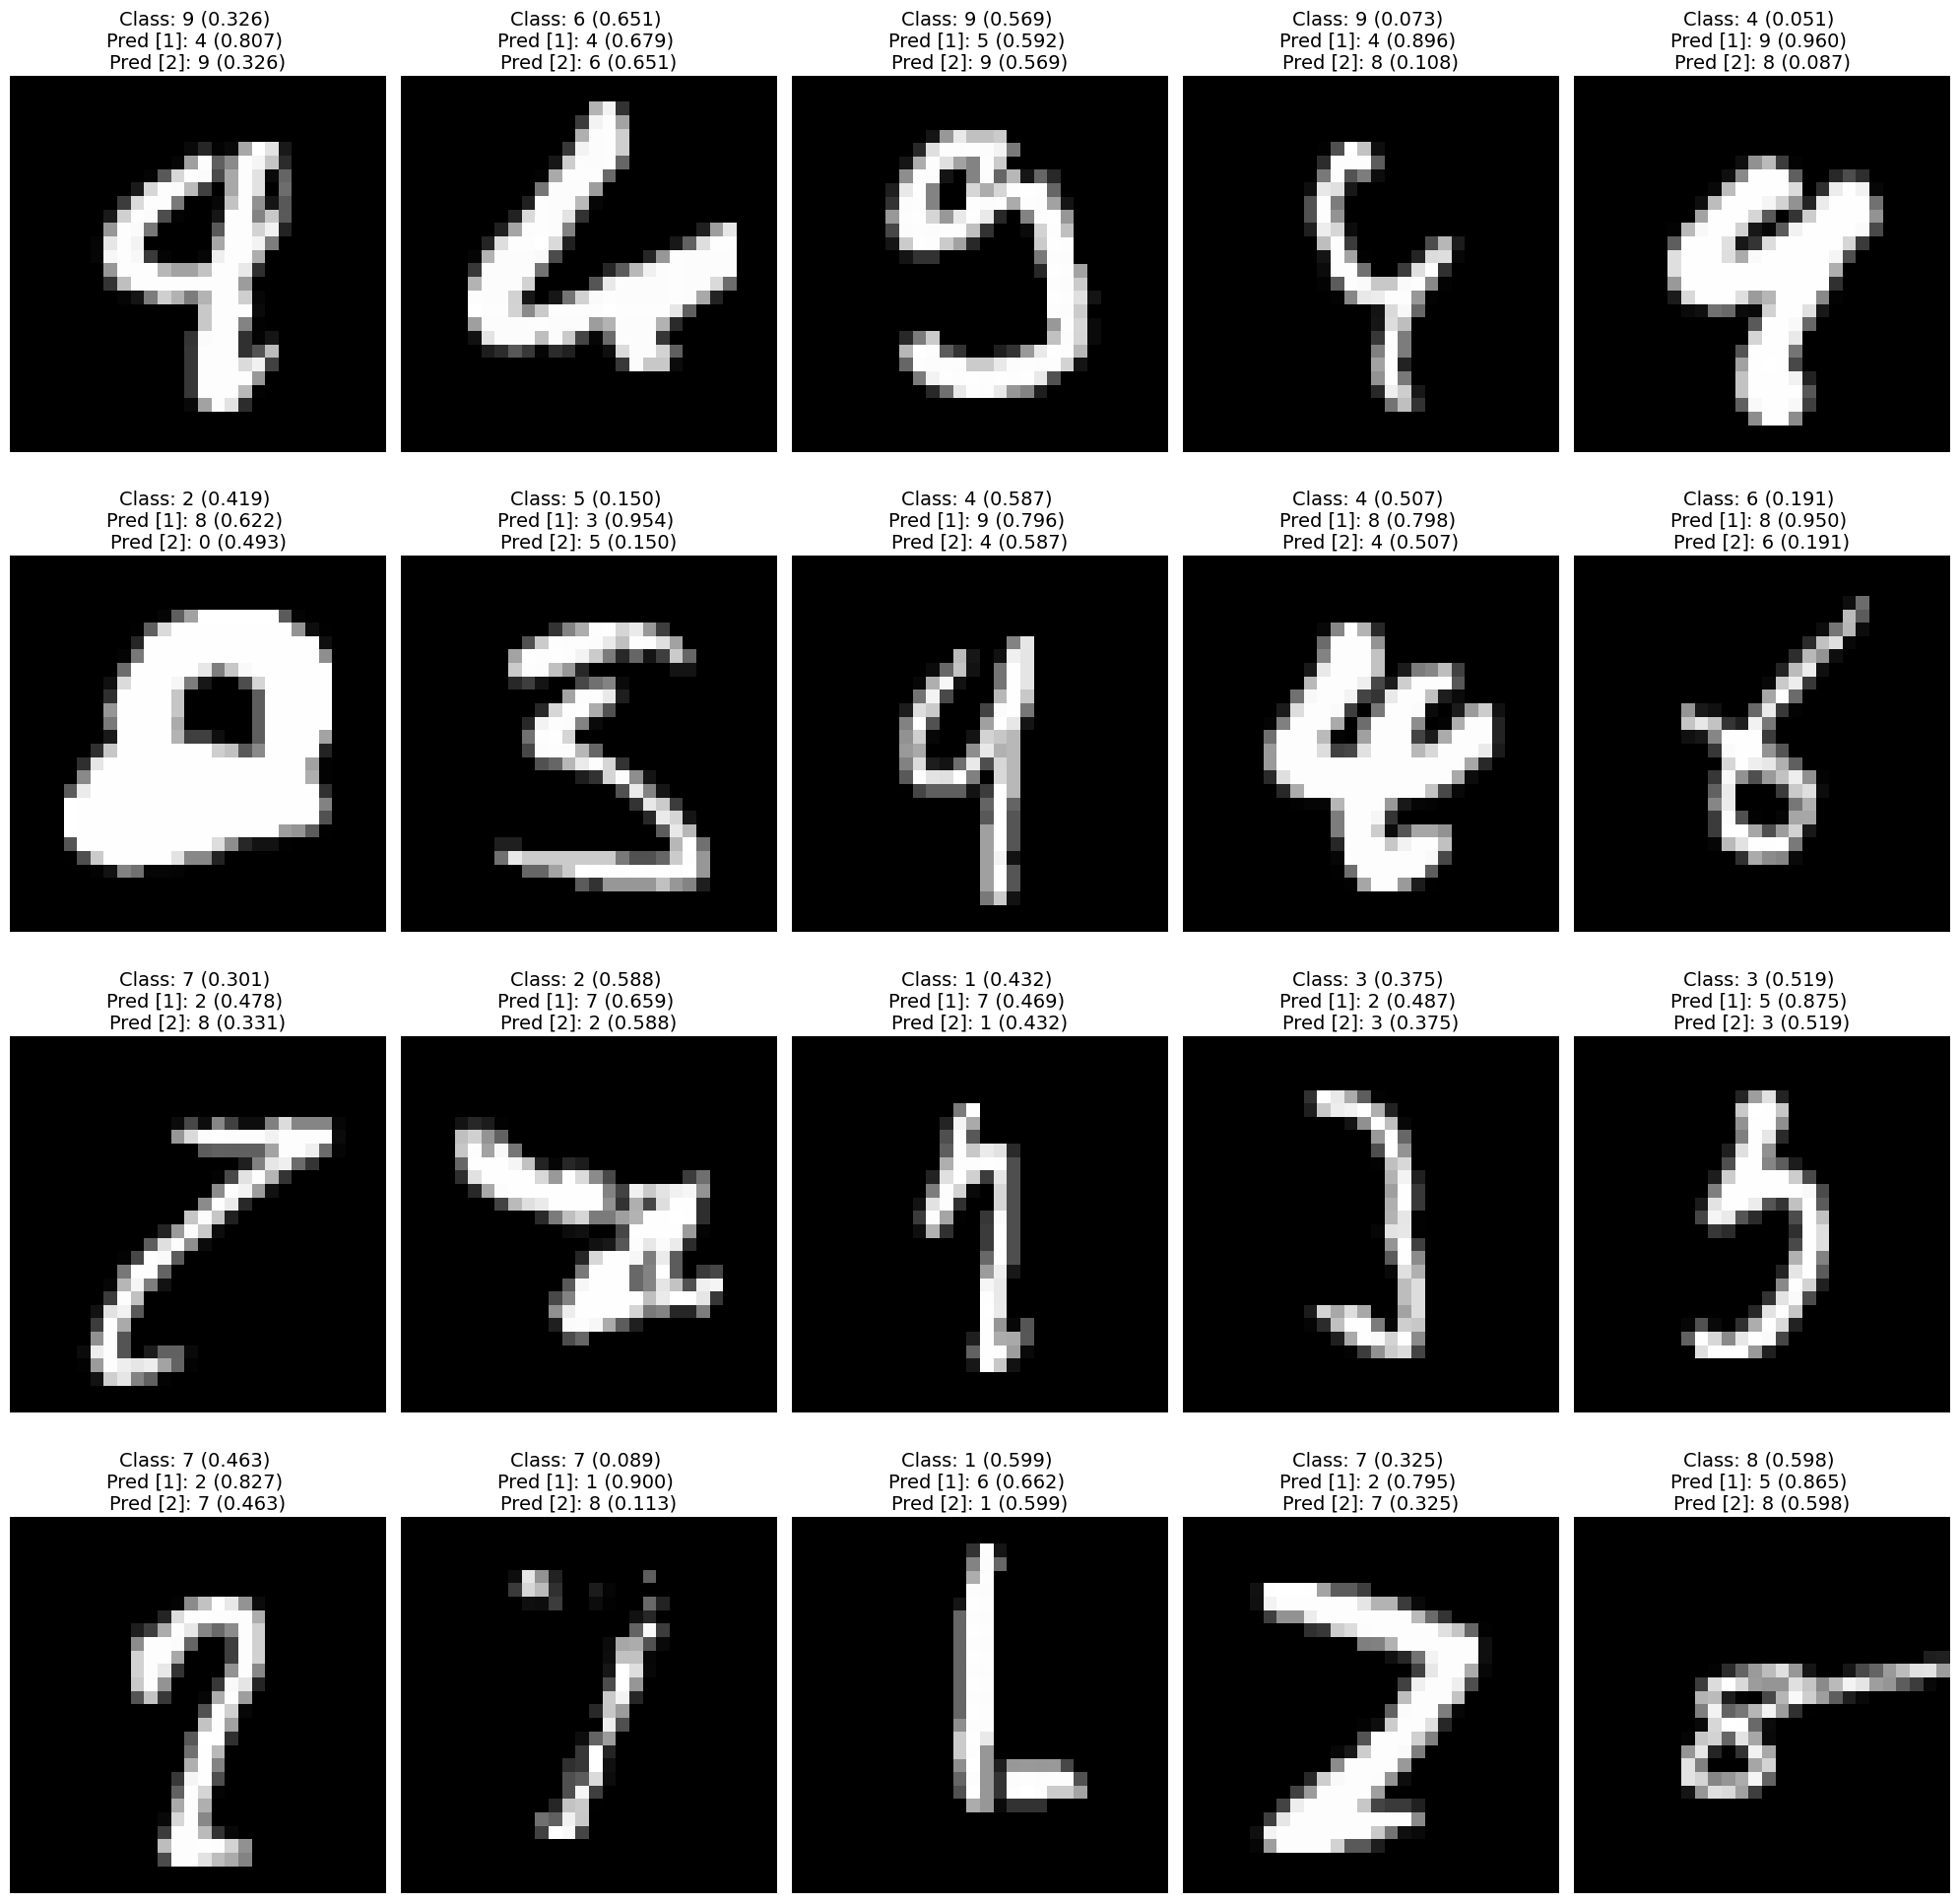

In [16]:
#not working with MultiMNIST
y_pred = model_test.predict(dataset.X_test)[0] # if "smallnorb" use X_test_patch

n_images = 20
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, # if "smallnorb" use X_test_patch
                n_images, dataset.class_names)